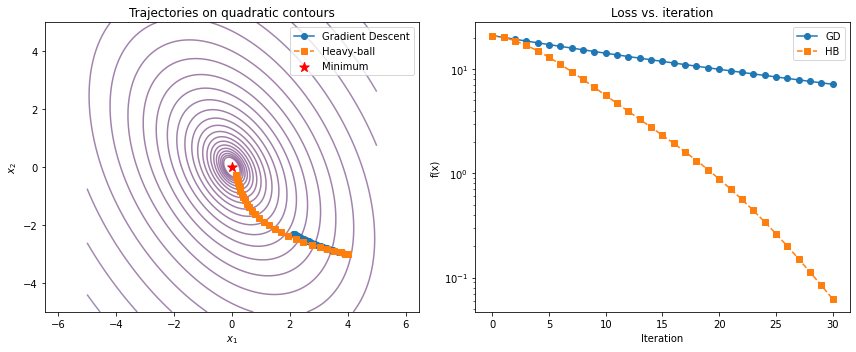

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Problem setup -------------------------------------------------------
A = np.array([[3.0, 1.0],
              [1.0, 2.0]])

def f(x):
    return 0.5 * x.T @ A @ x

def grad(x):
    return A @ x

alpha, beta, n_iter = 0.01, 0.8, 30
x0 = np.array([4.0, -3.0])

# ---- Gradient Descent ----------------------------------------------------
gd_path = [x0.copy()]
x = x0.copy()
for _ in range(n_iter):
    x = x - alpha * grad(x)
    gd_path.append(x.copy())

# ---- Heavy-ball momentum -------------------------------------------------
hb_path = [x0.copy()]
x_prev, x = x0.copy(), x0.copy()
for k in range(n_iter):
    update = -alpha * grad(x)
    if k > 0:
        update += beta * (x - x_prev)
    x_prev, x = x, x + update
    hb_path.append(x.copy())

gd_path, hb_path = np.array(gd_path), np.array(hb_path)

# ---- Figures ---------------------------------------------------
fig, (ax_ct, ax_loss) = plt.subplots(1, 2, figsize=(12, 5))

# Contours + trajectories (left figure)
x1 = np.linspace(-5, 5, 200)
x2 = np.linspace(-5, 5, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = 0.5 * (A[0,0]*X1**2 + 2*A[0,1]*X1*X2 + A[1,1]*X2**2)

levels = np.logspace(-1, 3, 30)
ax_ct.contour(X1, X2, Z, levels=levels, alpha=0.5)
ax_ct.plot(gd_path[:,0], gd_path[:,1], 'o-', label='Gradient Descent')
ax_ct.plot(hb_path[:,0], hb_path[:,1], 's--', label='Heavy-ball')
ax_ct.scatter(0, 0, c='red', marker='*', s=100, label='Minimum')
ax_ct.set_xlabel(r'$x_1$')
ax_ct.set_ylabel(r'$x_2$')
ax_ct.set_title('Trajectories on quadratic contours')
ax_ct.legend()
ax_ct.axis('equal')

# Loss curves (right figure)
gd_loss = [f(p) for p in gd_path]
hb_loss = [f(p) for p in hb_path]

ax_loss.plot(gd_loss, 'o-', label='GD')
ax_loss.plot(hb_loss, 's--', label='HB')
ax_loss.set_yscale('log')
ax_loss.set_xlabel('Iteration')
ax_loss.set_ylabel('f(x)')
ax_loss.set_title('Loss vs. iteration')
ax_loss.legend()

fig.tight_layout()

fig.savefig('trajectory_loss.pdf', format='pdf')

plt.show()
